# TODO:
* Categorical/Ordinal Features (binning):
    * one-hot encoding
    * grouping
    * entropy/MI
    * target-based categorical encoder

# General Statistics

In [2]:
df = pd.read_csv('../data/kc_house_data.csv', parse_dates=[1])  # parse date column
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Features

## date
* split by date
* plot trend/#transactions over time

In [6]:
df["date"].sort_values()

16768   2014-05-02
9596    2014-05-02
9587    2014-05-02
20602   2014-05-02
11577   2014-05-02
           ...    
7898    2015-05-14
928     2015-05-14
5637    2015-05-15
13053   2015-05-24
16594   2015-05-27
Name: date, Length: 21613, dtype: datetime64[ns]

In [7]:
df["date"].quantile(q=0.8)

Timestamp('2015-03-10 00:00:00')

In [8]:
(df['id'].value_counts()
         .where(lambda el: el > 1)
         .dropna()
)

795000620     3.0
8651510380    2.0
2568300045    2.0
9353300600    2.0
4139480200    2.0
             ... 
3630120700    2.0
4031000520    2.0
4302201085    2.0
2206700215    2.0
6021501535    2.0
Name: id, Length: 176, dtype: float64

In [9]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

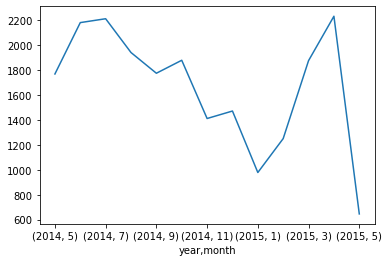

In [10]:
# #sales per month
df.groupby(['year', 'month']).size().plot();

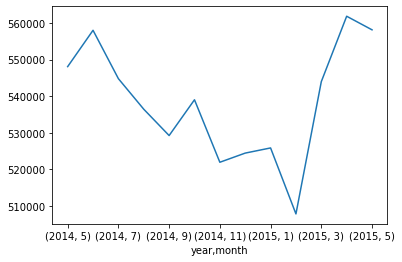

In [11]:
# average price sales over the months
df.groupby(['year', 'month'])['price'].mean().plot();

## zipcode
* potential splitbn
* information about locatio

In [12]:
# regression per zipcode?
df.groupby("zipcode").size().describe()

count     70.000000
mean     308.757143
std      142.267296
min       50.000000
25%      204.500000
50%      282.500000
75%      409.000000
max      602.000000
dtype: float64

In [13]:
# split by date and possible group by zipcode (train)
df.loc[df['date']  <= datetime.strptime("2015-03-10", "%Y-%m-%d")].groupby("zipcode").size().describe()

count     70.000000
mean     247.942857
std      113.657620
min       42.000000
25%      165.750000
50%      225.000000
75%      335.000000
max      484.000000
dtype: float64

In [14]:
# split by date and possible group by zipcode (test)
df.loc[df['date']  > datetime.strptime("2015-03-10", "%Y-%m-%d")].groupby("zipcode").size().describe()

count     70.000000
mean      60.814286
std       30.095160
min        8.000000
25%       38.750000
50%       59.000000
75%       77.750000
max      133.000000
dtype: float64

In [15]:
df_train = df[df['date']  <= datetime.strptime("2015-03-10", "%Y-%m-%d")].copy()
df_train.shape

(17356, 23)

## Target- price
* should look normal
* log-price as possible transformation
* plot- general and per zipcode

In [16]:
df_train.loc[:, 'log_price'] = np.log(df_train['price'])

In [17]:
df_train[['price', 'log_price']].describe()

,price,log_price
count,1.735600e+04,17356.000000
mean,5.364230e+05,13.040060
std,3.666853e+05,0.528123
min,7.500000e+04,11.225243
25%,3.199500e+05,12.675920
50%,4.490000e+05,13.014778
75%,6.390000e+05,13.367660
max,7.700000e+06,15.856731


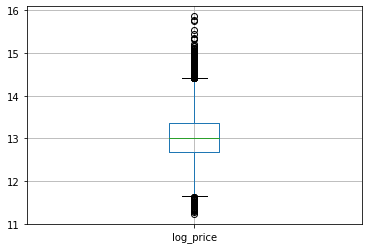

In [18]:
df_train[['log_price']].boxplot();

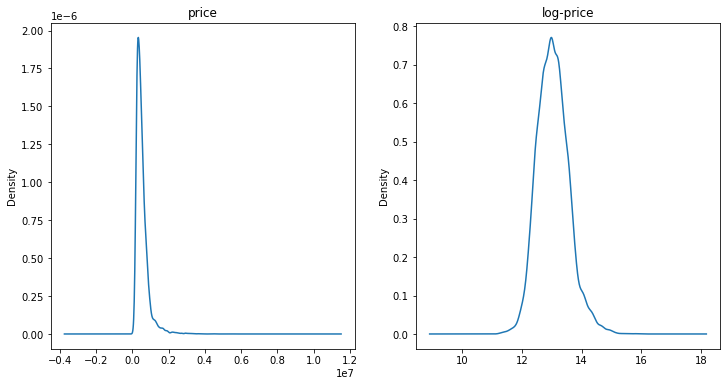

In [19]:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 6), ncols=2);
df_train['price'].plot(kind="kde",ax=ax1);
df_train['log_price'].plot(kind="kde", ax=ax2);
ax1.set_title("price")
ax2.set_title("log-price")
plt.show()

In [20]:
df_train_plot = df_train.loc[df_train["zipcode"].isin([98146, 98038, 98007, 98107, 98003, 98023, 98115, 98070, 98042])]

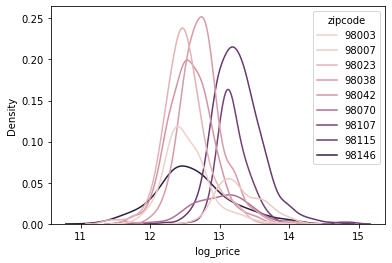

In [21]:
# looks approx. normal per zipcode
sns.kdeplot(data=df_train_plot, x="log_price", hue="zipcode");

## Discrete Variables

In [22]:
def convert_col2cat(df: pd.DataFrame, col: str, bins: Union[Iterable,int],
                    labels: Optional[Iterable]=None) -> Tuple[pd.Series, Dict[str, str]]:
    cat_col = pd.cut(df[col], bins=bins, labels=labels)
    mapping = dict(zip(cat_col.cat.codes, cat_col))
    cat_col = cat_col.cat.codes
    return cat_col, mapping


### bedrooms
* group values

In [23]:
# get categoreis
pd.cut(df_train['bedrooms'], bins=[-0.001, 2, 3, 4, 50]).cat.categories
# encode categories
# pd.cut(df_train['bedrooms'], bins=[-0.001, 2, 3, 4, 50]).cat.codes

IntervalIndex([(-0.001, 2.0], (2.0, 3.0], (3.0, 4.0], (4.0, 50.0]], dtype='interval[float64, right]')

In [24]:
pd.cut(df_train['bedrooms'], bins=[-0.001, 2, 3, 4, 50])

0           (2.0, 3.0]
1           (2.0, 3.0]
2        (-0.001, 2.0]
3           (3.0, 4.0]
4           (2.0, 3.0]
             ...      
21608       (2.0, 3.0]
21609       (3.0, 4.0]
21610    (-0.001, 2.0]
21611       (2.0, 3.0]
21612    (-0.001, 2.0]
Name: bedrooms, Length: 17356, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 2.0] < (2.0, 3.0] < (3.0, 4.0] < (4.0, 50.0]]

In [25]:
categories = pd.cut(df_train['bedrooms'], bins=[-0.001, 2, 3, 4, 50]).cat.categories
tmp = pd.cut(df_train['bedrooms'], bins=[-0.001, 2, 3, 4, 50]).cat.codes

In [26]:
# map from encoded value to category
tmp.map(dict(zip(tmp, pd.cut(df_train['bedrooms'], bins=[-0.001, 2, 3, 4, 50]))))

0           (2.0, 3.0]
1           (2.0, 3.0]
2        (-0.001, 2.0]
3           (3.0, 4.0]
4           (2.0, 3.0]
             ...      
21608       (2.0, 3.0]
21609       (3.0, 4.0]
21610    (-0.001, 2.0]
21611       (2.0, 3.0]
21612    (-0.001, 2.0]
Length: 17356, dtype: interval

In [27]:
df_train['grouped_bedrooms'], bedrooms_encode2cat = convert_col2cat(df_train, col="bedrooms", bins=[-0.001, 2, 3, 4, 50])

In [28]:
df_train['grouped_bedrooms'].map(bedrooms_encode2cat)

0           (2.0, 3.0]
1           (2.0, 3.0]
2        (-0.001, 2.0]
3           (3.0, 4.0]
4           (2.0, 3.0]
             ...      
21608       (2.0, 3.0]
21609       (3.0, 4.0]
21610    (-0.001, 2.0]
21611       (2.0, 3.0]
21612    (-0.001, 2.0]
Name: grouped_bedrooms, Length: 17356, dtype: interval

0       11
1      160
2     2184
3     7900
4     5558
5     1272
6      218
7       32
8       12
9        4
10       3
11       1
33       1
Name: bedrooms, dtype: int64


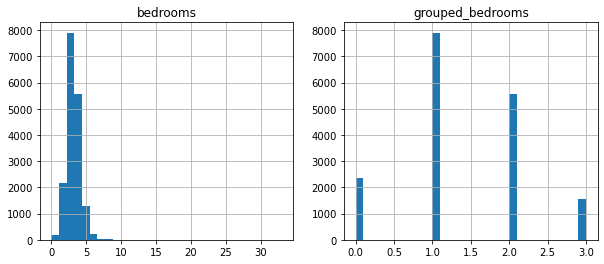

In [29]:
# quantile binning / entropy (MI) binning 
print(df_train['bedrooms'].value_counts().sort_index())
fig, axes = plt.subplots(figsize=(10, 4), ncols=2)
df_train['bedrooms'].hist(bins=30, ax=axes[0]);
df_train['grouped_bedrooms'].hist(bins=30, ax=axes[1]);
axes[0].set_title("bedrooms")
axes[1].set_title("grouped_bedrooms")
plt.show()

In [30]:
df_train["grouped_bedrooms"].value_counts()

1    7900
2    5558
0    2355
3    1543
Name: grouped_bedrooms, dtype: int64

In [31]:
df_train[["bedrooms", "grouped_bedrooms", "log_price"]].corr()

,bedrooms,grouped_bedrooms,log_price
bedrooms,1.000000,0.947547,0.342220
grouped_bedrooms,0.947547,1.000000,0.355562
log_price,0.342220,0.355562,1.000000


### bathrooms
* group values

In [32]:
# binnig? continuous?
print(df_train['bathrooms'].value_counts().sort_index())

0.00       8
0.50       4
0.75      60
1.00    3030
1.25       8
1.50    1156
1.75    2449
2.00    1571
2.25    1637
2.50    4322
2.75     967
3.00     614
3.25     473
3.50     600
3.75     119
4.00     110
4.25      65
4.50      88
4.75      21
5.00      16
5.25      12
5.50       9
5.75       4
6.00       4
6.25       2
6.50       1
6.75       2
7.50       1
7.75       1
8.00       2
Name: bathrooms, dtype: int64


In [33]:
df_train['grouped_bathrooms'], bathrooms_encode2cat = convert_col2cat(df_train, col="bathrooms", bins=[-0.001, 1, 2, 3, 20])

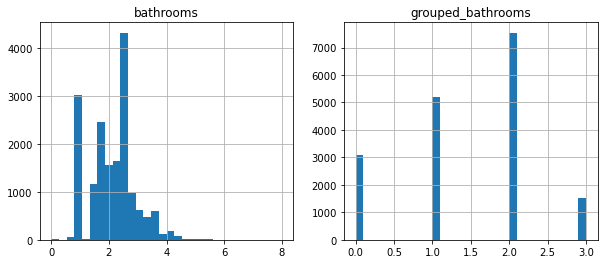

In [34]:
fig, axes = plt.subplots(figsize=(10, 4), ncols=2)
df_train['bathrooms'].hist(bins=30, ax=axes[0]);
df_train['grouped_bathrooms'].hist(bins=30, ax=axes[1]);
axes[0].set_title("bathrooms")
axes[1].set_title("grouped_bathrooms")
plt.show()

In [35]:
# df_train['grouped_bathrooms'].map(bathrooms_encode2cat)

In [36]:
df_train[['bathrooms', 'grouped_bathrooms', 'log_price']].corr()

,bathrooms,grouped_bathrooms,log_price
bathrooms,1.000000,0.945848,0.556656
grouped_bathrooms,0.945848,1.000000,0.521941
log_price,0.556656,0.521941,1.000000


### floors
* group values

In [37]:
print(df_train['floors'].value_counts().sort_index())

1.0    8542
1.5    1520
2.0    6653
2.5     134
3.0     501
3.5       6
Name: floors, dtype: int64


In [38]:
df_train['grouped_floors'], floors_encode2cat = convert_col2cat(df_train, col="floors", bins=[0, 1, 1.5, 2.0, 5])

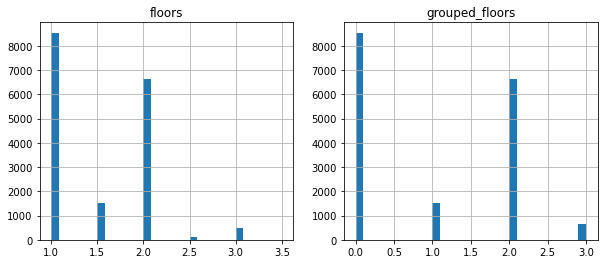

In [39]:
fig, axes = plt.subplots(figsize=(10, 4), ncols=2)
df_train['floors'].hist(bins=30, ax=axes[0]);
df_train['grouped_floors'].hist(bins=30, ax=axes[1]);
axes[0].set_title("floors")
axes[1].set_title("grouped_floors")
plt.show()

In [40]:
df_train[['floors', 'grouped_floors', 'log_price']].corr()

,floors,grouped_floors,log_price
floors,1.000000,0.988914,0.316061
grouped_floors,0.988914,1.000000,0.331116
log_price,0.316061,0.331116,1.000000


### waterfront
* check if informative enough

0    0.992395
1    0.007605
Name: waterfront, dtype: float64


<AxesSubplot: >

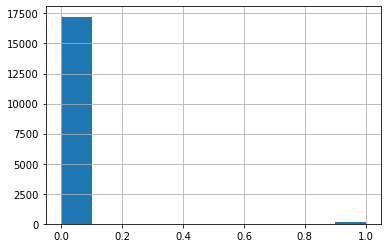

In [41]:
# binary- too skewed (remove)
print(df_train['waterfront'].value_counts(normalize=True))
df_train['waterfront'].hist()

### view
* check if informative enough
* add possible additional indicator

   view_count  view_normalized
0       15650         0.901705
2         768         0.044250
3         415         0.023911
1         264         0.015211
4         259         0.014923


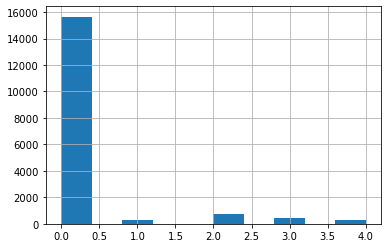

In [42]:

print(pd.concat([df_train['view'].value_counts().rename("view_count"), 
                 df_train['view'].value_counts(normalize=True).rename("view_normalized")], axis=1))
df_train['view'].hist();

In [43]:
df_train['has_view'] = (df_train['view'] > 0).astype(int)
pd.concat([df_train['has_view'].value_counts(), 
           df_train['has_view'].value_counts(normalize=True).rename("has_view (normalized)")],
          axis=1)

,has_view,has_view (normalized)
0,15650,0.901705
1,1706,0.098295


In [44]:
df_train['has_view'].value_counts(normalize=True)

0    0.901705
1    0.098295
Name: has_view, dtype: float64

In [45]:
df_train.groupby("has_view")["log_price"].describe()

,count,mean,std,min,25%,50%,75%,max
has_view,,,,,,,,
0,15650.0,12.981753,0.488132,11.225243,12.644166,12.971540,13.303017,15.532906
1,1706.0,13.574942,0.578465,11.944708,13.180632,13.537777,13.955055,15.856731


<AxesSubplot: xlabel='log_price', ylabel='Count'>

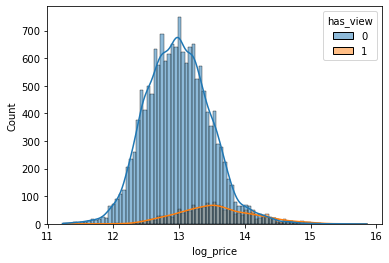

In [46]:
sns.histplot(data=df_train, x="log_price", hue="has_view", kde=True)

In [47]:
df_train[["view", "has_view", "log_price"]].corr()

,view,has_view,log_price
view,1.000000,0.926473,0.351465
has_view,0.926473,1.000000,0.334401
log_price,0.351465,0.334401,1.000000


### condition
* check if informative enough
* regroup

In [49]:
df_train['grouped_condition'], condition_encode2cat = convert_col2cat(df_train, col="condition", bins=[0, 2, 3, 4, 5])

In [50]:
df_train['grouped_condition'].value_counts()

1    11166
2     4575
3     1460
0      155
Name: grouped_condition, dtype: int64

In [51]:
pd.concat([df_train['condition'].value_counts().sort_index().rename('condition'),
           df_train['condition'].value_counts(normalize=True).sort_index().rename('normalized_condition')],
          axis=1)


,condition,normalized_condition
1,24,0.001383
2,131,0.007548
3,11166,0.643351
4,4575,0.263598
5,1460,0.084121


In [52]:
df_train.groupby(["condition"])['price'].mean()

condition
1    336539.583333
2    320254.435115
3    537779.641680
4    518039.813770
5    606334.173973
Name: price, dtype: float64

In [53]:
df_train.groupby(["yr_built", "condition"])['price'].mean()

yr_built  condition
1900      1            392725.000000
          2            560000.000000
          3            591943.750000
          4            513470.000000
          5            720080.692308
                           ...      
2011      3            544614.070796
2012      3            521765.508065
2013      3            685972.825806
2014      3            686677.386503
2015      3            636976.235294
Name: price, Length: 409, dtype: float64

In [54]:
# small correlation between target and condition (removed)
df_train[["condition", "grouped_condition", "log_price"]].corr()

,condition,grouped_condition,log_price
condition,1.000000,0.998424,0.043734
grouped_condition,0.998424,1.000000,0.041766
log_price,0.043734,0.041766,1.000000


### grade
* regroup

In [100]:
df_train['grade'].value_counts().sort_index()

1        1
3        3
4       22
5      188
6     1605
7     7191
8     4876
9     2126
10     930
11     328
12      74
13      12
Name: grade, dtype: int64

In [102]:
df_train['grouped_grade'], grade_encode2cat = convert_col2cat(df_train, col="grade", bins=[-0.001, 5, 6, 7, 8, 9, 10, 20])

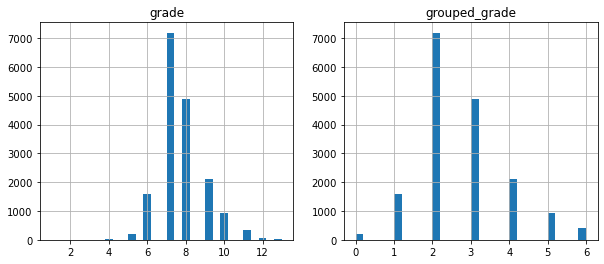

In [103]:
fig, axes = plt.subplots(figsize=(10, 4), ncols=2)
df_train['grade'].hist(bins=30, ax=axes[0]);
df_train['grouped_grade'].hist(bins=30, ax=axes[1]);
axes[0].set_title("grade")
axes[1].set_title("grouped_grade")
plt.show()

In [104]:
df_train[["grade", "grouped_grade", "log_price"]].corr()

,grade,grouped_grade,log_price
grade,1.000000,0.996591,0.710314
grouped_grade,0.996591,1.000000,0.708131
log_price,0.710314,0.708131,1.000000


## Continuous Variables

### sqft_living, sqft_living15
* check transformations- log/sqrt

In [105]:
df_train[['sqft_living', 'sqft_living15']].describe()

,sqft_living,sqft_living15
count,17356.000000,17356.000000
mean,2088.619209,1990.343051
std,926.124972,688.371864
min,290.000000,460.000000
25%,1430.000000,1490.000000
50%,1920.000000,1840.000000
75%,2560.000000,2370.000000
max,13540.000000,6210.000000


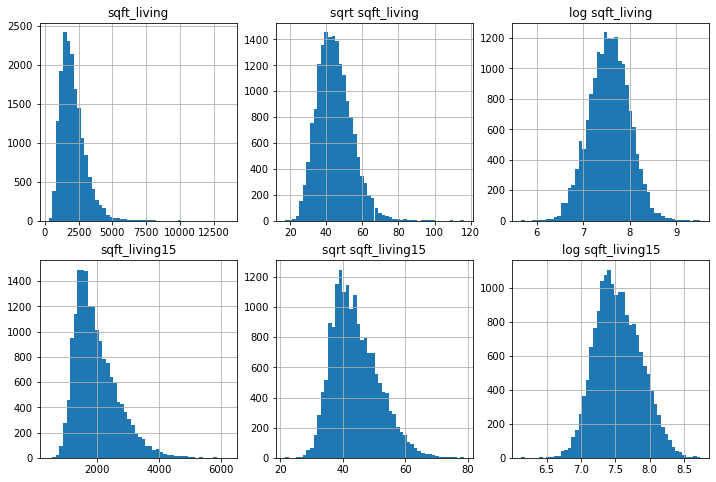

In [106]:
# transformations: noting/identity, sqrt, and log

fig, axes = plt.subplots(figsize=(12, 8), nrows=2, ncols=3)  # , sharey=True
df_train['sqft_living'].hist(bins=50, ax=axes[0, 0])
axes[0, 0].set_title("sqft_living")
np.sqrt(df_train['sqft_living']).hist(bins=50, ax=axes[0, 1]);
axes[0, 1].set_title("sqrt sqft_living")
np.log(df_train['sqft_living']).hist(bins=50, ax=axes[0, 2]);
axes[0, 2].set_title("log sqft_living")
df_train['sqft_living15'].hist(bins=50, ax=axes[1, 0])
axes[1, 0].set_title("sqft_living15")
np.sqrt(df_train['sqft_living15']).hist(bins=50, ax=axes[1, 1]);
axes[1, 1].set_title("sqrt sqft_living15")
np.log(df_train['sqft_living15']).hist(bins=50, ax=axes[1, 2]);
axes[1, 2].set_title("log sqft_living15")

plt.show()

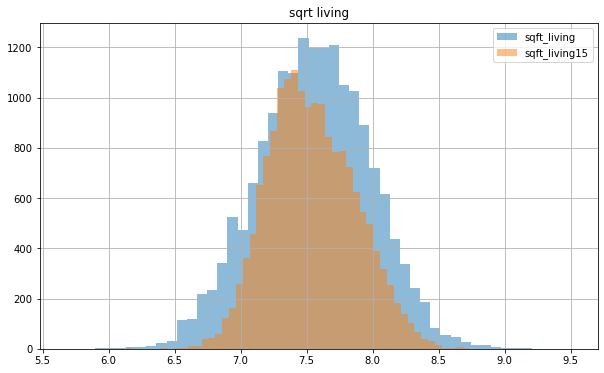

In [107]:
fix, ax = plt.subplots(figsize=(10, 6))
np.log(df_train['sqft_living']).hist(bins=50, ax=ax, label='sqft_living', alpha=0.5);
np.log(df_train['sqft_living15']).hist(bins=50, ax=ax, label='sqft_living15', alpha=0.5);
ax.legend()
ax.set(title='sqrt living')
plt.show()

In [108]:
df_train['log_sqft_living'] = np.log(df_train['sqft_living'])
df_train['log_sqft_living15'] = np.log(df_train['sqft_living15'])

In [109]:
df_train[['sqft_living', 'sqft_living15', 'log_sqft_living', 'log_sqft_living15', 'log_price']].corr()

,sqft_living,sqft_living15,log_sqft_living,log_sqft_living15,log_price
sqft_living,1.000000,0.753912,0.952927,0.730782,0.701319
sqft_living15,0.753912,1.000000,0.736168,0.976995,0.622194
log_sqft_living,0.952927,0.736168,1.000000,0.746840,0.681944
log_sqft_living15,0.730782,0.976995,0.746840,1.000000,0.611030
log_price,0.701319,0.622194,0.681944,0.611030,1.000000


### sqft_lot, sqft_lot15
* check transformations- log/sqrt

In [111]:
df_train[['sqft_lot', 'sqft_lot15']].describe()

,sqft_lot,sqft_lot15
count,1.735600e+04,17356.000000
mean,1.496019e+04,12629.457940
std,3.873647e+04,26188.942326
min,5.200000e+02,651.000000
25%,5.080000e+03,5100.000000
50%,7.649500e+03,7626.000000
75%,1.075850e+04,10125.000000
max,1.074218e+06,871200.000000


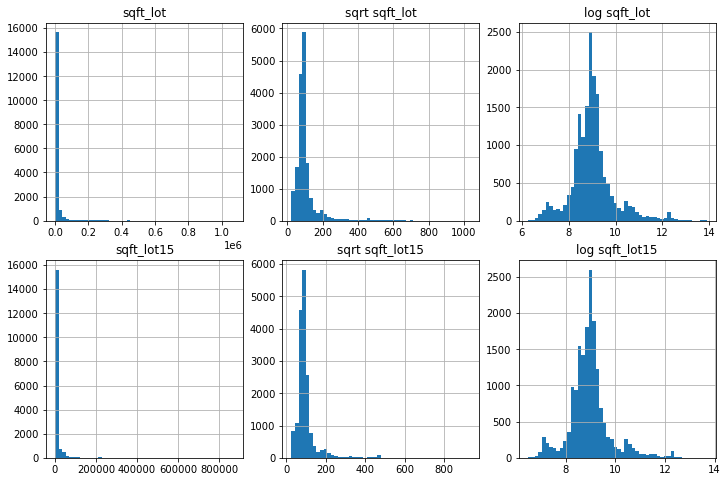

In [112]:
# transformations: noting/identity, sqrt, and log

fig, axes = plt.subplots(figsize=(12, 8), nrows=2, ncols=3)  # , sharey=True
df_train['sqft_lot'].hist(bins=50, ax=axes[0, 0])
axes[0, 0].set_title("sqft_lot")
np.sqrt(df_train['sqft_lot']).hist(bins=50, ax=axes[0, 1]);
axes[0, 1].set_title("sqrt sqft_lot")
np.log(df_train['sqft_lot']).hist(bins=50, ax=axes[0, 2]);
axes[0, 2].set_title("log sqft_lot")
df_train['sqft_lot15'].hist(bins=50, ax=axes[1, 0])
axes[1, 0].set_title("sqft_lot15")
np.sqrt(df_train['sqft_lot15']).hist(bins=50, ax=axes[1, 1]);
axes[1, 1].set_title("sqrt sqft_lot15")
np.log(df_train['sqft_lot15']).hist(bins=50, ax=axes[1, 2]);
axes[1, 2].set_title("log sqft_lot15")

plt.show()

In [113]:
df_train["log_sqft_lot"] = np.log(df_train['sqft_lot'])
df_train["log_sqft_lot15"] = np.log(df_train['sqft_lot15'])

In [114]:
df_train[["sqft_lot", "sqft_lot15", "log_sqft_lot", "log_sqft_lot15",  "log_price"]].corr()

,sqft_lot,sqft_lot15,log_sqft_lot,log_sqft_lot15,log_price
sqft_lot,1.000000,0.719535,0.657666,0.568386,0.103125
sqft_lot15,0.719535,1.000000,0.627803,0.705509,0.089937
log_sqft_lot,0.657666,0.627803,1.000000,0.919223,0.139106
log_sqft_lot15,0.568386,0.705509,0.919223,1.000000,0.122035
log_price,0.103125,0.089937,0.139106,0.122035,1.000000


In [115]:
df_train[["log_sqft_lot", "log_sqft_lot15"]].describe()

,log_sqft_lot,log_sqft_lot15
count,17356.000000,17356.000000
mean,8.993636,8.961899
std,0.900504,0.809447
min,6.253829,6.478510
25%,8.533067,8.536996
50%,8.942396,8.939319
75%,9.283451,9.222763
max,13.887104,13.677627


### sqft_above
* check transformations- log/sqrt

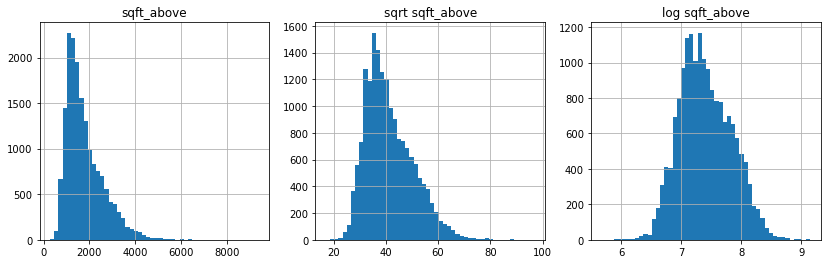

In [116]:
# transformations: noting/identity, sqrt, and log

fig, axes = plt.subplots(figsize=(14, 4), ncols=3)  # , sharey=True
df_train['sqft_above'].hist(bins=50, ax=axes[0])
axes[0].set_title("sqft_above")
np.sqrt(df_train['sqft_above']).hist(bins=50, ax=axes[1]);
axes[1].set_title("sqrt sqft_above")
np.log(df_train['sqft_above']).hist(bins=50, ax=axes[2]);
axes[2].set_title("log sqft_above")

plt.show()

In [117]:
df_train["sqrt_sqft_above"] = np.sqrt(df_train['sqft_above'])
df_train["log_sqft_above"] = np.log(df_train['sqft_above'])

In [118]:
df_train[["sqft_above", "sqrt_sqft_above", "log_sqft_above"]].describe()

,sqft_above,sqrt_sqft_above,log_sqft_above
count,17356.000000,17356.000000,17356.000000
mean,1795.060094,41.363521,7.398069
std,834.672945,9.171917,0.428767
min,290.000000,17.029386,5.669881
25%,1200.000000,34.641016,7.090077
50%,1570.000000,39.623226,7.358831
75%,2220.000000,47.116876,7.705262
max,9410.000000,97.005155,9.149528


In [119]:
df_train[["sqft_above", "sqrt_sqft_above", "log_sqft_above", "log_price"]].corr()

,sqft_above,sqrt_sqft_above,log_sqft_above,log_price
sqft_above,1.000000,0.989825,0.961435,0.608516
sqrt_sqft_above,0.989825,1.000000,0.990497,0.605916
log_sqft_above,0.961435,0.990497,1.000000,0.592497
log_price,0.608516,0.605916,0.592497,1.000000


### sqft_basement
* check transformations- log/sqrt
* check indicator- has basement

In [71]:
df_train["has_basement"] = (df_train["sqft_basement"] > 0).astype("int")

0       0.607052
600     0.010141
700     0.009910
800     0.009910
500     0.009737
          ...   
2500    0.000058
4820    0.000058
2350    0.000058
2490    0.000058
274     0.000058
Name: sqft_basement, Length: 288, dtype: float64


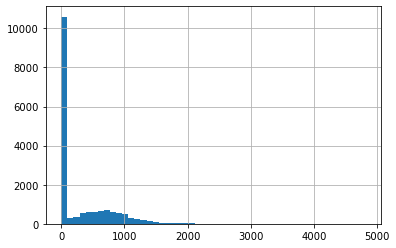

In [264]:
print(df_train['sqft_basement'].value_counts(normalize=True))
df_train['sqft_basement'].hist(bins=50);

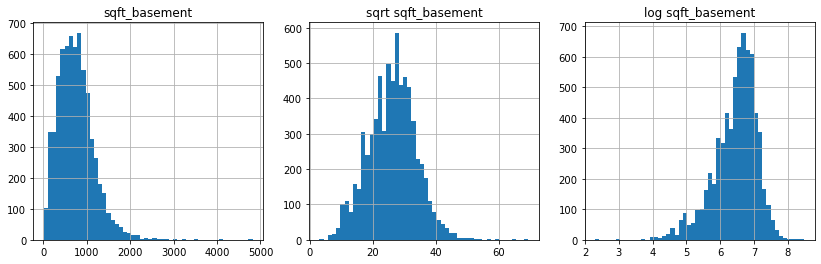

In [120]:
fig, axes = plt.subplots(figsize=(14, 4), ncols=3)  # , sharey=True
df_train.loc[df_train['sqft_basement'] > 0, 'sqft_basement'].hist(bins=50, ax=axes[0])
axes[0].set_title("sqft_basement")
np.sqrt(df_train.loc[df_train['sqft_basement'] > 0, 'sqft_basement']).hist(bins=50, ax=axes[1]);
axes[1].set_title("sqrt sqft_basement")
np.log(df_train.loc[df_train['sqft_basement'] > 0, 'sqft_basement']).hist(bins=50, ax=axes[2]);
axes[2].set_title("log sqft_basement")

plt.show()

In [121]:
df_train["sqrt_sqft_basement"] = np.sqrt(df_train['sqft_basement'])

In [123]:
df_train[["sqft_basement", "sqrt_sqft_basement"]].describe()

,sqft_basement,sqrt_sqft_basement
count,17356.000000,17356.000000
mean,293.559115,10.325991
std,445.957352,13.672739
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,570.000000,23.874673
max,4820.000000,69.426220


In [122]:
df_train[["sqft_basement", "sqrt_sqft_basement", "log_price"]].corr()

,sqft_basement,sqrt_sqft_basement,log_price
sqft_basement,1.000000,0.961898,0.317513
sqrt_sqft_basement,0.961898,1.000000,0.279222
log_price,0.317513,0.279222,1.000000


In [126]:
df_train.loc[df_train["sqft_basement"] > 0, ["sqft_basement", "sqrt_sqft_basement", "log_price"]].corr()

,sqft_basement,sqrt_sqft_basement,log_price
sqft_basement,1.000000,0.978125,0.406638
sqrt_sqft_basement,0.978125,1.000000,0.378493
log_price,0.406638,0.378493,1.000000


### yr_built
* **house_age**: check transformations- reverse + sqrt/log

count    17356.000000
mean      1971.037221
std         29.355197
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64


<AxesSubplot: >

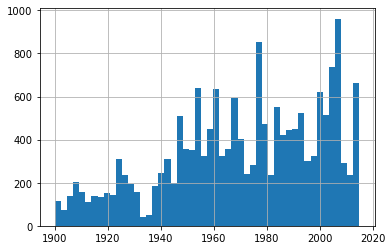

In [134]:
print(df_train['yr_built'].describe())
df_train['yr_built'].hist(bins=50)

In [141]:
df_train["house_age"] = df_train['yr_built'].max() - df_train['yr_built']

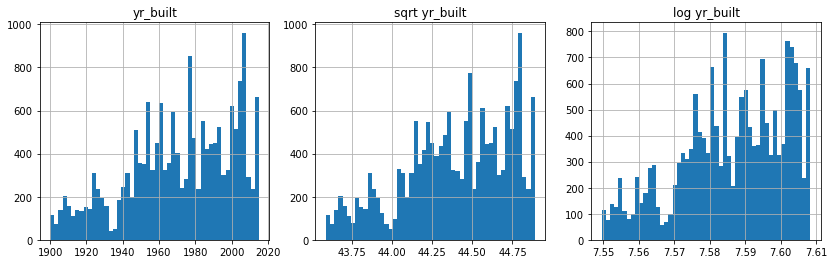

In [197]:
fig, axes = plt.subplots(figsize=(14, 4), ncols=3)  # , sharey=True
df_train['yr_built'].hist(bins=50, ax=axes[0])
axes[0].set_title("yr_built")
np.sqrt(df_train['yr_built']).hist(bins=50, ax=axes[1]);
axes[1].set_title("sqrt yr_built")
# np.log(df_train['house_age']).hist(bins=50, ax=axes[2]);
df_train['yr_built'].transform(lambda el: np.log(el) if el > 0 else el).hist(bins=50, ax=axes[2]);
axes[2].set_title("log yr_built")

plt.show()

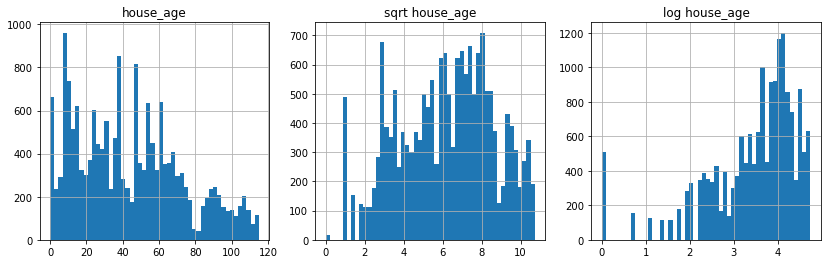

In [145]:
fig, axes = plt.subplots(figsize=(14, 4), ncols=3)  # , sharey=True
df_train['house_age'].hist(bins=50, ax=axes[0])
axes[0].set_title("house_age")
np.sqrt(df_train['house_age']).hist(bins=50, ax=axes[1]);
axes[1].set_title("sqrt house_age")
# np.log(df_train['house_age']).hist(bins=50, ax=axes[2]);
df_train['house_age'].transform(lambda el: np.log(el) if el > 0 else el).hist(bins=50, ax=axes[2]);
axes[2].set_title("log house_age")

plt.show()

In [147]:
df_train['sqrt_house_age'] = np.sqrt(df_train['house_age'])

In [148]:
df_train[["condition", "yr_built", "sqrt_house_age", "log_price"]].corr()

,condition,yr_built,sqrt_house_age,log_price
condition,1.000000,-0.372003,0.392135,0.043734
yr_built,-0.372003,1.000000,-0.975687,0.083828
sqrt_house_age,0.392135,-0.975687,1.000000,-0.119494
log_price,0.043734,0.083828,-0.119494,1.000000


### yr_renovated
* check if informative

In [149]:
# binary or remove
print(df_train['yr_renovated'].value_counts(normalize=True).head())

0       0.956614
2014    0.004782
2013    0.001844
2003    0.001729
2000    0.001556
Name: yr_renovated, dtype: float64


In [80]:
# remove
df_train[["sqft_living", "sqft_living15", "sqft_above", "yr_built", "yr_renovated", "log_price"]].corr()

,sqft_living,sqft_living15,sqft_above,yr_built,yr_renovated,log_price
sqft_living,1.000000,0.767360,0.875633,0.345444,0.044388,0.675028
sqft_living15,0.767360,1.000000,0.733590,0.318946,-0.002233,0.610485
sqft_above,0.875633,0.733590,1.000000,0.443997,0.013394,0.577359
yr_built,0.345444,0.318946,0.443997,1.000000,-0.208912,0.068080
yr_renovated,0.044388,-0.002233,0.013394,-0.208912,1.000000,0.096781
log_price,0.675028,0.610485,0.577359,0.068080,0.096781,1.000000


### lat/long
* check if informative enough
* problematic distributions -> removed

In [161]:
df_train[["lat", "long"]].describe()

,lat,long
count,17356.000000,17356.000000
mean,47.560776,-122.213941
std,0.138649,0.140971
min,47.155900,-122.519000
25%,47.472500,-122.328000
50%,47.573850,-122.231000
75%,47.678500,-122.125000
max,47.777600,-121.315000


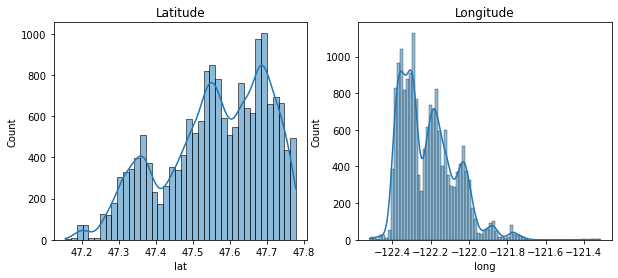

In [156]:
fig, axes = plt.subplots(figsize=(10, 4), ncols=2)
sns.histplot(data=df_train, x='lat', kde=True, ax=axes[0]);
sns.histplot(data=df_train, x='long', kde=True, ax=axes[1]);
# fig, axes = plt.subplots(figsize=(10, 4), ncols=2)
# df_train['grade'].hist(bins=30, ax=axes[0]);
# df_train['grouped_grade'].hist(bins=30, ax=axes[1]);
axes[0].set_title("Latitude")
axes[1].set_title("Longitude")
plt.show()

<AxesSubplot: xlabel='long', ylabel='Count'>

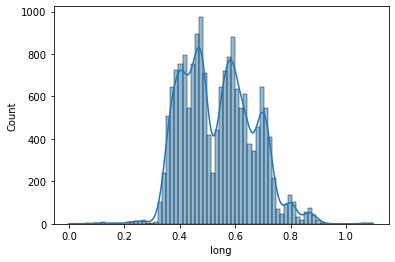

In [215]:
sns.histplot(np.sqrt(df_train["long"] - df_train["long"].min()), kde=True)

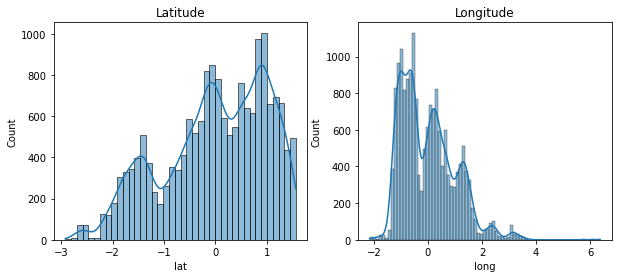

In [207]:
df_lat_long = pd.DataFrame(
    StandardScaler().fit_transform(df_train[["lat", "long"]]), 
    columns=["lat", "long"]
)
fig, axes = plt.subplots(figsize=(10, 4), ncols=2)
sns.histplot(data=df_lat_long, x='lat', kde=True, ax=axes[0]);
sns.histplot(data=df_lat_long, x='long', kde=True, ax=axes[1]);
# fig, axes = plt.subplots(figsize=(10, 4), ncols=2)
# df_train['grade'].hist(bins=30, ax=axes[0]);
# df_train['grouped_grade'].hist(bins=30, ax=axes[1]);
axes[0].set_title("Latitude")
axes[1].set_title("Longitude")
plt.show()

In [162]:
df_train.groupby(["lat", "long"]).size().value_counts()

1    16400
2      437
3       22
4        4
dtype: int64

In [163]:
df_train[["lat", "long", "log_price"]].corr()

,lat,long,log_price
lat,1.00000,-0.132940,0.447800
long,-0.13294,1.000000,0.055715
log_price,0.44780,0.055715,1.000000
